## a) Dependencies

In [73]:
# External Dependencies
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sys

## b) Notebook Settings

In [74]:
# Show ALL outputs in cell, not only last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.float_format = '{:.4f}'.format # 4 decimal places

# Set relative path mapping for module imports
relative_filepath = "../../"
sys.path.append(relative_filepath)

# Change defaults
sns.set(style='whitegrid',
        #context='talk'
       )

## c) Load Pickled Data

In [75]:
# Read in pickled combined data
X_y_data = pd.read_pickle(relative_filepath + "data/interim/step_3a/X_y_data.pkl")

# Read in pickled train data
X_y_train = pd.read_pickle(relative_filepath + "data/interim/step_3a/X_y_train.pkl")

# Read in pickled test data
X_y_test = pd.read_pickle(relative_filepath + "data/interim/step_3a/X_y_test.pkl")

# Recap data structure
X_y_train.head()
X_y_train.shape

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
0,a,17.9200,0.0001,u,-0.8402,0.5229,1.7500,f,t,1,t,g,80.0000,5,800000.0000,t,0,0
1,b,16.9200,0.0000,y,-2.1596,0.7742,0.2900,f,f,0,f,s,200.0000,0,2000000.0000,NaN,0,0
2,b,31.2500,0.0001,u,1.7507,0.7604,0.0000,f,t,1,f,g,96.0000,19,960000.0000,t,0,0
3,a,48.1700,0.0001,u,4.1749,0.8890,0.3350,f,f,0,f,g,0.0000,120,0.0000,NaN,0,0
4,b,32.3300,0.0003,u,-3.7855,0.4890,0.5000,f,f,0,t,g,232.0000,0,2320000.0000,f,0,0


(3700, 18)

In [76]:
#values for config dict
input_dfs = [X_y_data,
             X_y_train,
             X_y_test]

target = "classLabel"

dict_data_cleaning = {}

In [77]:
# Numeric data & cols
num_X_y_train = X_y_train.select_dtypes(include=[np.number])
#num_X_y_train = X_y_train.select_dtypes(['int', 'float'])
numeric_cols = num_X_y_train.columns.values

# Categorical data & cols
cat_X_y_train = X_y_train.select_dtypes(exclude=[np.number])
#cat_X_y_train = X_y_train.select_dtypes(['object', 'bool'])
cat_cols = cat_X_y_train.columns.values

print("Numerical cols:", numeric_cols)
#python 2.8 print(f"{numeric_cols=}")
print("Categorical cols:", cat_cols)
print("")

print("Total cols == Num cols + Cat cols:")
len(X_y_data.columns) == len(num_X_y_train.columns)+len(cat_X_y_train.columns)

Numerical cols: ['v2' 'v3' 'v5' 'v6' 'v7' 'v10' 'v13' 'v14' 'v15' 'v17' 'classLabel']
Categorical cols: ['v1' 'v4' 'v8' 'v9' 'v11' 'v12' 'v16']

Total cols == Num cols + Cat cols:


True

## Data Structure, Data Types & Summary Statistics

In [78]:
print ("## Shape of X_y_train ## \n")
print(f"{X_y_train.shape[0]} rows and {X_y_train.shape[1]} columns")

## Shape of X_y_train ## 

3700 rows and 18 columns


In [79]:
X_y_train.dtypes
#X_y_train.info()

v1             object
v2            float64
v3            float64
v4             object
v5            float64
v6            float64
v7            float64
v8             object
v9             object
v10             int64
v11            object
v12            object
v13           float64
v14             int64
v15           float64
v16            object
v17             int64
classLabel      int64
dtype: object

In [80]:
print ("## All dtypes summary statistics ## \n")
X_y_train.describe(include='all').T
print ("## Numeric only summary statistics ## \n")
X_y_train.describe(include=[np.number]).T
print ("## Object only summary statistics ## \n")
X_y_train.describe(include=[object]).T

## All dtypes summary statistics ## 



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
v1,3661,2,b,2382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v2,3661.0000,NaN,NaN,NaN,32.8207,12.6662,13.7500,23.0000,28.6700,40.8300,80.2500
v3,3700.0000,NaN,NaN,NaN,0.0006,0.0005,0.0000,0.0001,0.0004,0.0010,0.0028
v4,3636,3,u,3055,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v5,3700.0000,NaN,NaN,NaN,-0.0533,2.8712,-4.9969,-2.5163,-0.0528,2.4063,4.9993
v6,3700.0000,NaN,NaN,NaN,0.7842,0.1365,0.2739,0.6931,0.7878,0.8761,1.2151
v7,3700.0000,NaN,NaN,NaN,3.4395,4.3352,0.0000,0.5000,1.7500,5.0000,28.5000
v8,3700,2,t,3171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v9,3700,2,t,2239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,3700.0000,NaN,NaN,NaN,4.1600,6.7506,0.0000,0.0000,2.0000,6.0000,67.0000


## Numeric only summary statistics ## 



,count,mean,std,min,25%,50%,75%,max
v2,3661.0000,32.8207,12.6662,13.7500,23.0000,28.6700,40.8300,80.2500
v3,3700.0000,0.0006,0.0005,0.0000,0.0001,0.0004,0.0010,0.0028
v5,3700.0000,-0.0533,2.8712,-4.9969,-2.5163,-0.0528,2.4063,4.9993
v6,3700.0000,0.7842,0.1365,0.2739,0.6931,0.7878,0.8761,1.2151
v7,3700.0000,3.4395,4.3352,0.0000,0.5000,1.7500,5.0000,28.5000
v10,3700.0000,4.1600,6.7506,0.0000,0.0000,2.0000,6.0000,67.0000
v13,3600.0000,162.6950,156.0457,0.0000,0.0000,120.0000,280.0000,1160.0000
v14,3700.0000,2246.7059,8708.5711,0.0000,0.0000,113.0000,1059.7500,100000.0000
v15,3600.0000,1626950.0000,1560456.8185,0.0000,0.0000,1200000.0000,2800000.0000,11600000.0000
v17,3700.0000,0.9254,0.2628,0.0000,1.0000,1.0000,1.0000,1.0000


## Object only summary statistics ## 



,count,unique,top,freq
v1,3661,2,b,2382
v4,3636,3,u,3055
v8,3700,2,t,3171
v9,3700,2,t,2239
v11,3700,2,f,1924
v12,3700,3,g,3430
v16,1555,2,t,1023


## Duplicates

In [81]:
# generate count statistics of duplicate entries
print ("## Number of duplicate rows ## \n")
if len(X_y_train[X_y_train.duplicated()]) > 0:
    print("Number of duplicate observations: ", len(X_y_train[X_y_train.duplicated()]))
    X_y_train[X_y_train.duplicated(keep=False)].sort_values(by=list(X_y_train.columns)).head()
else:
    print("No duplicate observations found")

## Number of duplicate rows ## 

No duplicate observations found


In [82]:
dict_data_cleaning['DUPLICATES_'] = 'No duplicate observations found'

In [83]:
dict_data_cleaning

{'DUPLICATES_': 'No duplicate observations found'}

## Missing/Null Values

In [84]:
X_y_train.isna().sum()

v1              39
v2              39
v3               0
v4              64
v5               0
v6               0
v7               0
v8               0
v9               0
v10              0
v11              0
v12              0
v13            100
v14              0
v15            100
v16           2145
v17              0
classLabel       0
dtype: int64

In [85]:
null = (X_y_train.isna().sum()/len(X_y_train))*100
type(null)
null[null > 0].sort_values()

pandas.core.series.Series

v1     1.0541
v2     1.0541
v4     1.7297
v13    2.7027
v15    2.7027
v16   57.9730
dtype: float64

In [86]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in X_y_train.columns:
    pct_missing = np.mean(X_y_train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 1)))

v1 - 1.1%
v2 - 1.1%
v3 - 0.0%
v4 - 1.7%
v5 - 0.0%
v6 - 0.0%
v7 - 0.0%
v8 - 0.0%
v9 - 0.0%
v10 - 0.0%
v11 - 0.0%
v12 - 0.0%
v13 - 2.7%
v14 - 0.0%
v15 - 2.7%
v16 - 58.0%
v17 - 0.0%
classLabel - 0.0%


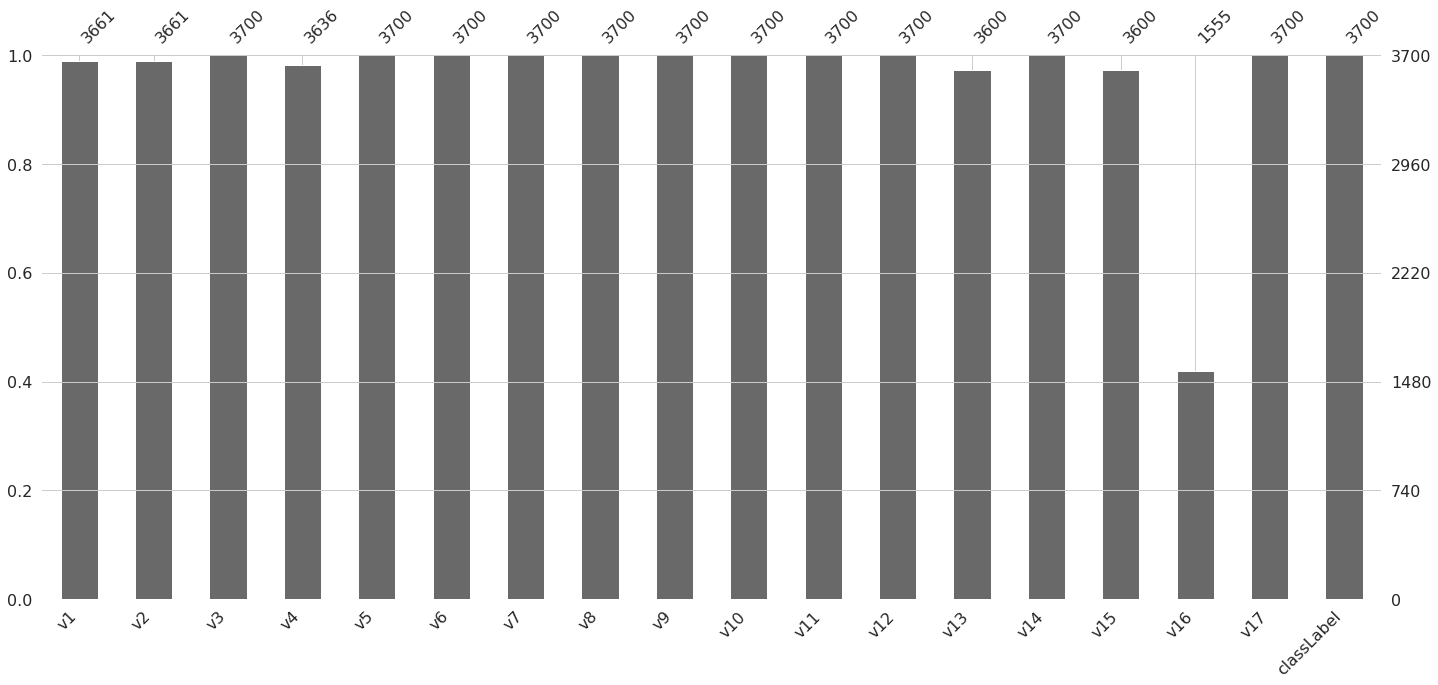

In [87]:
import missingno as msno
%matplotlib inline

msno.bar(X_y_train);


Preview of data with null values:
xxxxxxxxxxxxx


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,classLabel
1,b,16.9200,0.0000,y,-2.1596,0.7742,0.2900,f,f,0,f,s,200.0000,0,2000000.0000,NaN,0,0
3,a,48.1700,0.0001,u,4.1749,0.8890,0.3350,f,f,0,f,g,0.0000,120,0.0000,NaN,0,0
6,a,26.1700,0.0002,u,-0.6396,0.5184,0.0000,f,f,0,t,g,276.0000,1,2760000.0000,NaN,0,0


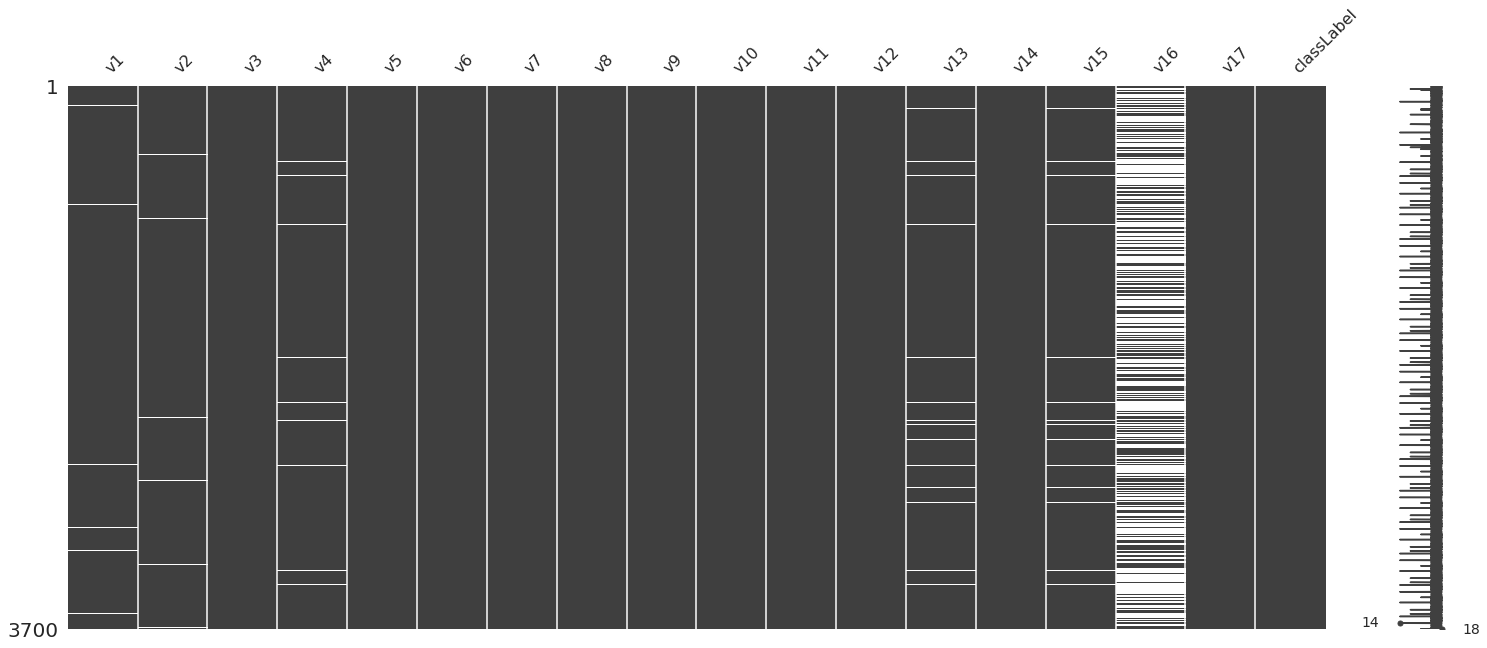

In [88]:
# generate preview of entries with null values
if len(X_y_train[X_y_train.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    X_y_train[X_y_train.isnull().any(axis=1)].head(3)
    msno_matrix = msno.matrix(X_y_train)

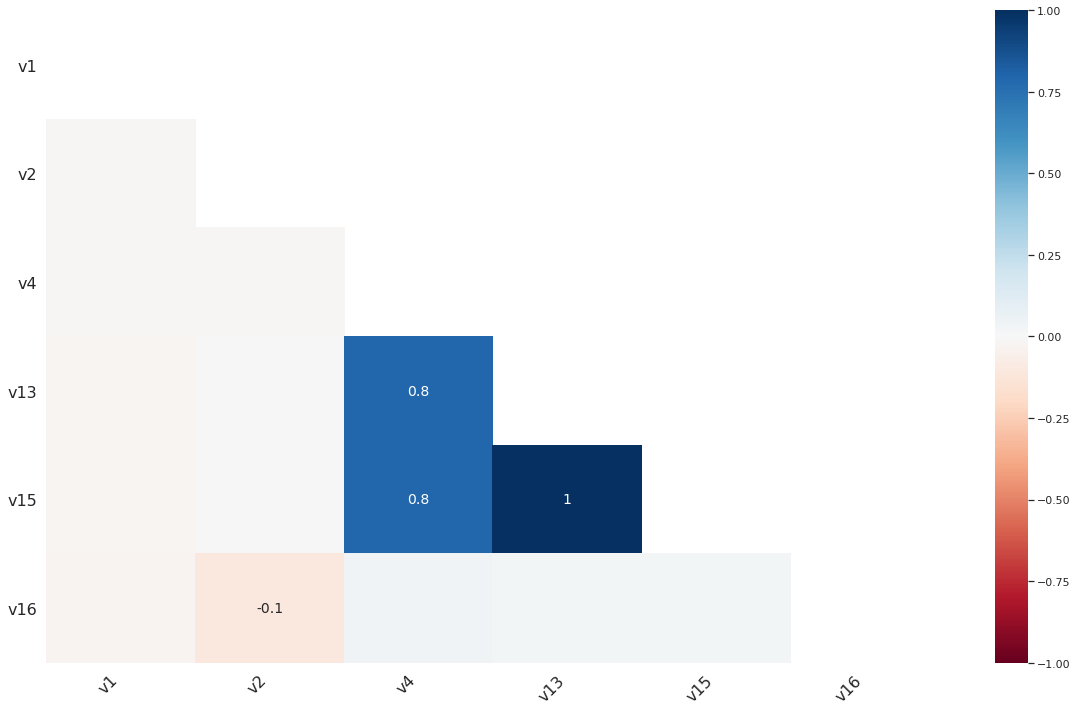

In [89]:
msno.heatmap(X_y_train);

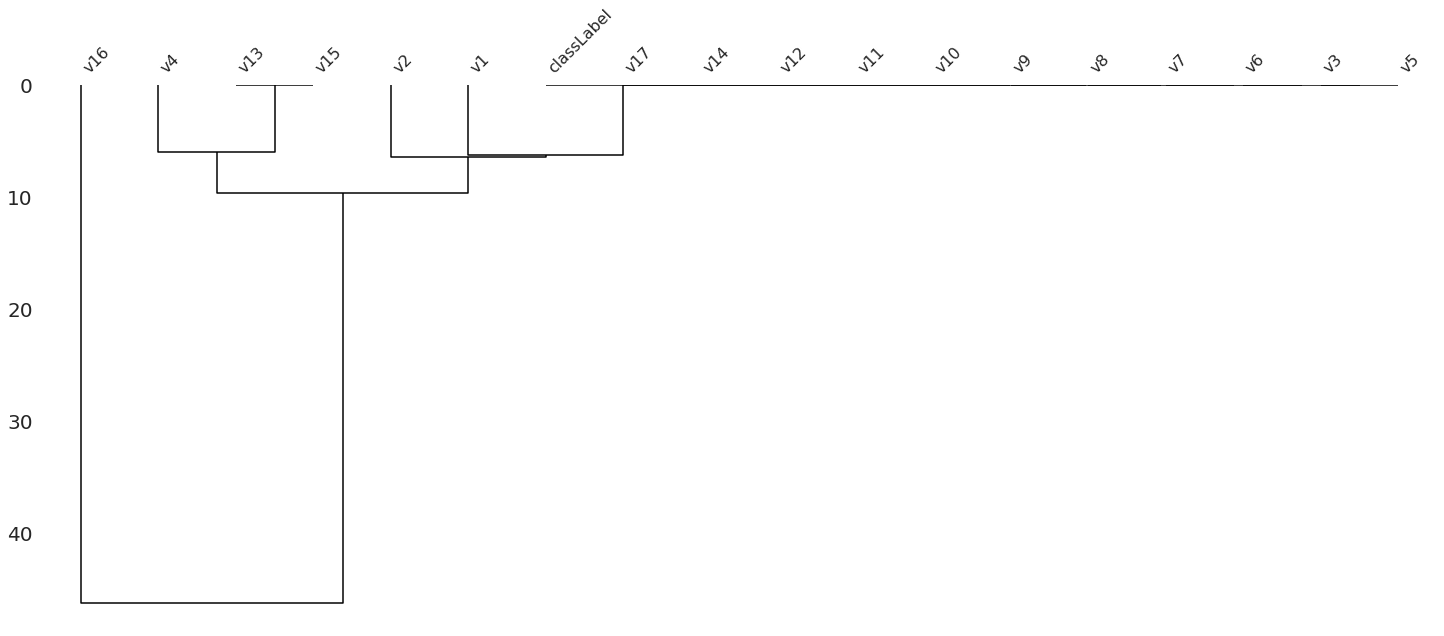

In [90]:
msno.dendrogram(X_y_train);

## Type of Missingness

In [91]:
# MCAR (Missing Completely At Random)

In [92]:
# MAR (Missing At Random)

In [93]:
# MNAR (Missing NOT At Random)

In [94]:
dict_data_cleaning['MISSING_v1'] = 'v1 is missing 1.1% of observations; Low missingness % and low missingness correlation so MCAR?'
dict_data_cleaning['MISSING_v2'] = 'v2 is missing 1.1% of observations; Low missingness % and low missingness correlation so MCAR?'
dict_data_cleaning['MISSING_v4'] = 'v4 is missing 1.7% of observations; Low missingness % but 80% missingness correlation with v13 & v15 so MAR?'
dict_data_cleaning['MISSING_v13'] = 'v13 is missing 2.7% of observations; Low missingness % but 100% missingness correlation with v15 so MAR?'
dict_data_cleaning['MISSING_v15'] = 'v15 is missing 2.7% of observations; Low missingness % but 100% missingness correlation with v13 so MAR?'
dict_data_cleaning['MISSING_v16'] = 'v16 is missing 58.0% of observations; High missingness % and low missingness correlation'


In [95]:
dict_data_cleaning

{'DUPLICATES_': 'No duplicate observations found',
 'MISSING_v1': 'v1 is missing 1.1% of observations; Low missingness % and low missingness correlation so MCAR?',
 'MISSING_v2': 'v2 is missing 1.1% of observations; Low missingness % and low missingness correlation so MCAR?',
 'MISSING_v4': 'v4 is missing 1.7% of observations; Low missingness % but 80% missingness correlation with v13 & v15 so MAR?',
 'MISSING_v13': 'v13 is missing 2.7% of observations; Low missingness % but 100% missingness correlation with v15 so MAR?',
 'MISSING_v15': 'v15 is missing 2.7% of observations; Low missingness % but 100% missingness correlation with v13 so MAR?',
 'MISSING_v16': 'v16 is missing 58.0% of observations; High missingness % and low missingness correlation'}

## Analysing Numerical Variables

In [96]:
print("Numerical cols:", numeric_cols)
#print(f"{numeric_cols=}")

Numerical cols: ['v2' 'v3' 'v5' 'v6' 'v7' 'v10' 'v13' 'v14' 'v15' 'v17' 'classLabel']


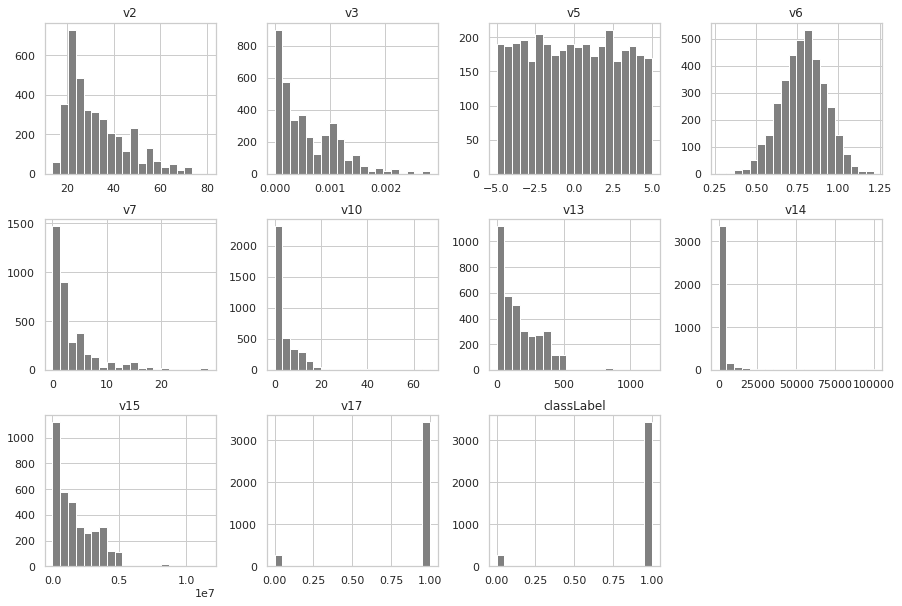

In [104]:
num_X_y_train.hist(bins=20, 
                   figsize=(15, 10),
                   layout=(3, 4),
                   color = "grey");

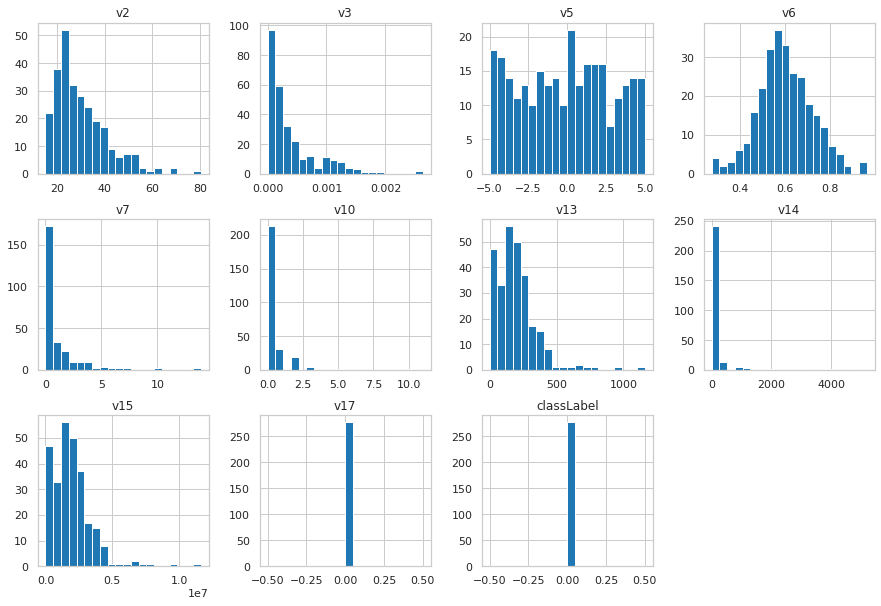

In [106]:
num_X_y_train[num_X_y_train[target]==0].hist(bins=20, 
                                             figsize=(15, 10),
                                             layout=(3, 4),
                                             color = "tab:blue");

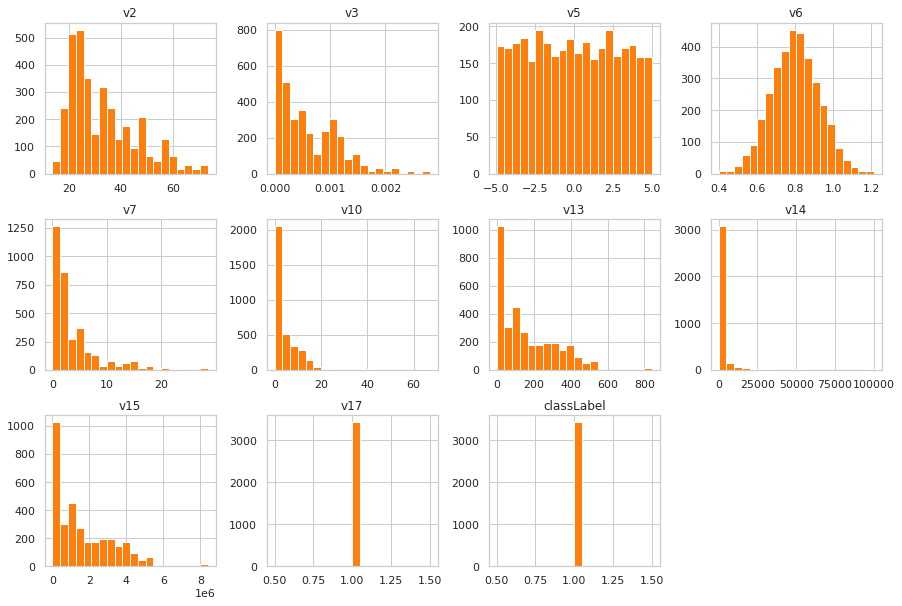

In [107]:
num_X_y_train[num_X_y_train[target]==1].hist(bins=20, 
                                             figsize=(15, 10),
                                             layout=(3, 4),
                                             color = "tab:orange");

In [108]:
num_X_y_train[target].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    92.5%
0     7.5%
Name: classLabel, dtype: object

In [109]:
dict_data_cleaning['CLASS_IMBALANCE'] = '92.5% of target are 1s'
dict_data_cleaning

{'DUPLICATES_': 'No duplicate observations found',
 'MISSING_v1': 'v1 is missing 1.1% of observations; Low missingness % and low missingness correlation so MCAR?',
 'MISSING_v2': 'v2 is missing 1.1% of observations; Low missingness % and low missingness correlation so MCAR?',
 'MISSING_v4': 'v4 is missing 1.7% of observations; Low missingness % but 80% missingness correlation with v13 & v15 so MAR?',
 'MISSING_v13': 'v13 is missing 2.7% of observations; Low missingness % but 100% missingness correlation with v15 so MAR?',
 'MISSING_v15': 'v15 is missing 2.7% of observations; Low missingness % but 100% missingness correlation with v13 so MAR?',
 'MISSING_v16': 'v16 is missing 58.0% of observations; High missingness % and low missingness correlation',
 'CLASS_IMBALANCE': '92.5% of target are 1s'}

## Analysing Categorical Variables

In [38]:
print("Categorical cols:", cat_cols)

Categorical cols: ['v1' 'v4' 'v8' 'v9' 'v11' 'v12' 'v16']


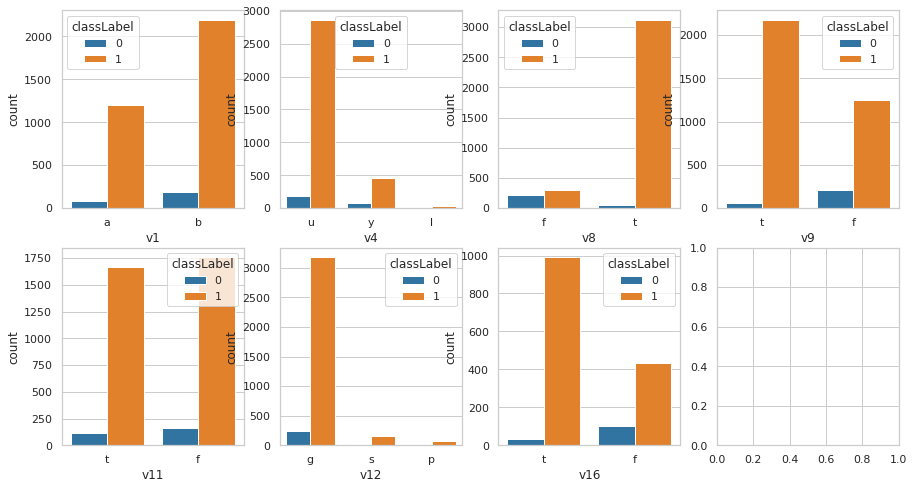

In [116]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for var, subplot in zip(cat_cols, ax.flatten()):
    
    countplot = sns.countplot(data=X_y_train,
                              x=var,
                              hue=target,
                              ax=subplot,
                              palette=["tab:blue","tab:orange"]
                             )
    
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

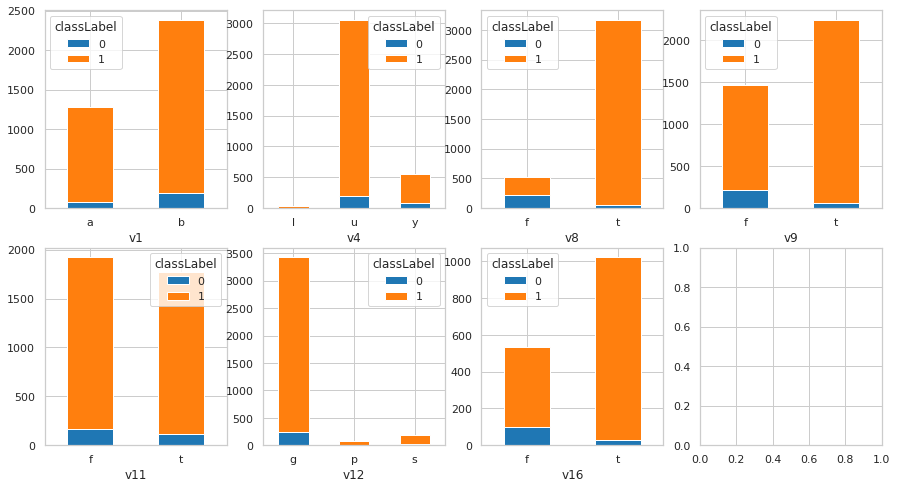

In [114]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for var, subplot in zip(cat_cols, ax.flatten()):
    
    ct = pd.crosstab(X_y_train[var],
                     X_y_train[target])
    
    stackedbar = ct.plot.bar(stacked=True,
                             ax=subplot,
                             color=["tab:blue","tab:orange"]
                            )
    
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

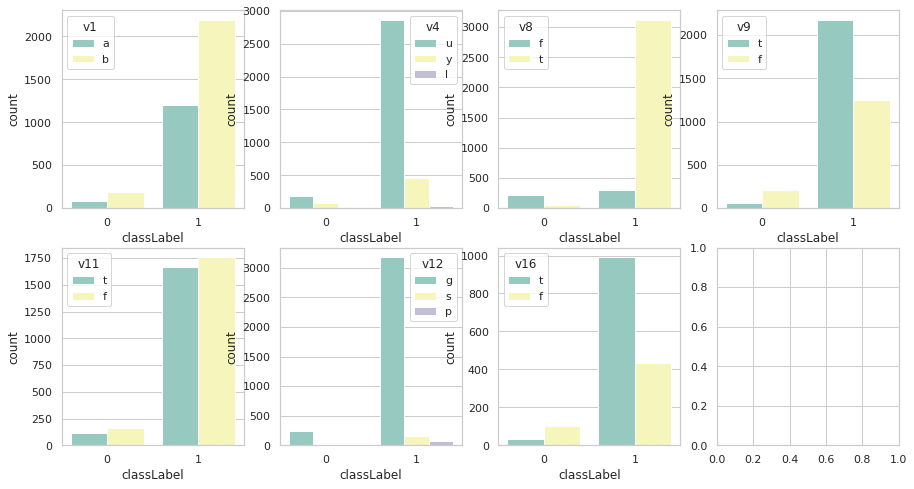

In [113]:
fig, ax = plt.subplots(2, 4, figsize=(15, 8))
for var, subplot in zip(cat_cols, ax.flatten()):
    
    countplot = sns.countplot(data=X_y_train,
                              x=target,
                              hue=var,
                              ax=subplot,
                              palette="Set3"
                              )
    
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

## Correlations / Relationships

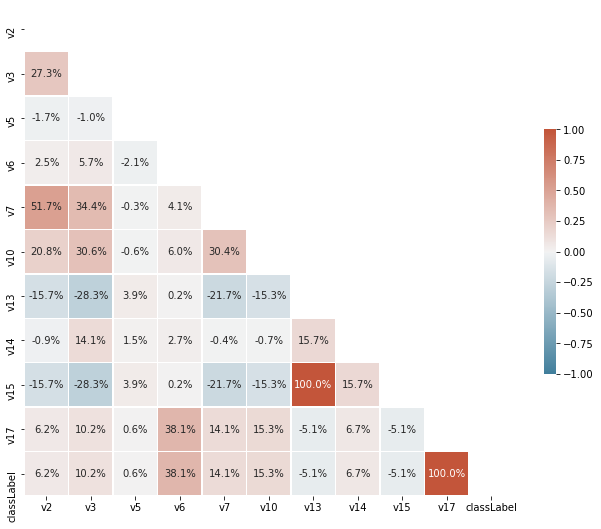

In [45]:
# Compute the correlation matrix

corr = X_y_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            annot=True,
            d,
            mask=mask,
            cmap=cmap,
            vmax=1,
            vmin=-1,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5});

In [ ]:
dict_data_cleaning['CORRELATIONS_OVER_25%_v2']= 'v2:  v3, v7'
dict_data_cleaning['CORRELATIONS_OVER_25%_v3']= 'v3:  '

dict_data_cleaning

## Analysing Numerical to Numerical Relationships

In [ ]:
print("Numerical cols:", numeric_cols)

In [ ]:
pairplot_vars = ['']

# Pairplot scatter
sns.pairplot(data=num_X_y_train,
             #vars = pairplot_vars,
             hue = target,
             kind = "reg",
             #diag_kind = "hist",
             corner = True,
             plot_kws=dict(scatter_kws=dict(s=1))
            )

## Analysing Numerical to Categorical Relationships

In [ ]:
print("Numerical cols:", numeric_cols)
print("Categorical cols:", cat_cols)

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10));
for var, subplot in zip(cat_cols, ax.flatten()):
    
    boxplot = sns.boxplot(data=X_y_train,
                          x=var,
                          y='v2',
                          hue=target,
                          ax=subplot,
                          #palette="Set3"
                         )

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10));
for var, subplot in zip(cat_cols, ax.flatten()):\
    
    violinplot = sns.violinplot(data=X_y_train,
                                x=var,
                                y='v2',
                                hue=target,
                                ax=subplot,
                                #palette="Set3"
                               )

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10));
for var, subplot in zip(cat_cols, ax.flatten()):
    
    stripplot = sns.stripplot(data=X_y_train,
                              x=var,
                              y='v2',
                              hue=target,
                              ax=subplot,
                              #palette="Set3",
                              jitter=0.25,
                              s=2
                             )

## Identify Outliers

In [ ]:
dict_data_cleaning['OUTLIERS_'] = ''

In [ ]:
dict_data_cleaning

## Manual Bespoke EDA Checklist

In [ ]:
0. Questions To Ask Before You Download the Data

I called this one step 0 because it happens before you import data into Python. 
It’s easy to forget, but if you can answer these questions it can save you a lot of time and frustration down the road.
    How was this data collected/where did it come from?
    
    Why am I interested in this data?
    
    What would be the target variable of interest? (if applicable)
    
    Is this data from a reputable source?
    
    Is there enough data here to make an ML model?
    
    Have other people conducted a similar analysis/modeling project on this dataset? Do I want to be able to learn from their conclusions or create a novel project?
    
    Is there a data dictionary for the dataset? Is it complete?
    
    Are there any additional challenges or problems that I anticipate if I use this data?
    
    It’s helpful to use these questions like a filter when you have a choice on what dataset to use.
    
    It’s really tough to realize halfway through a project that you picked a bad dataset.

### 1. Data Structure & Distributions

In [ ]:
Questions to answer:
    How many features do you have?
    How many observations do you have?
    What is the data type of each feature?
    
    From what you know about the features of your dataset, do the data types make sense? Do you need to change any?

    Example: Your data has a Customer ID number for every row, and each number is five digits long, stored as an integer. 
        You will not ever be aggregating or analyzing the Customer ID like an integer, so you should change it to the “object” data type.
    
    Do you have null values? (to be fixed later)
    
    How much memory does this dataset use? Could this pose a problem for you later on?

#### How many features do you have?
#### How many observations do you have?

#### What is the data type of each feature?
#### From what you know about the features of your dataset, do the data types make sense? 
#### Do you need to change any data types?
#### Do you have null values? (to be fixed later)

#### How much memory does this dataset use? 
#### Could this pose a problem for you later on?

In [ ]:
Questions to answer:
Are the max/min values reasonable for the variables? Do you see any values that look like errors?
What is the mean for each variable? What do the means tell you about your dataset as a whole?

#### Questions to answer:
#### What is the distribution of each variable?
#### Do there appear to be outliers? (to be fixed later)
#### Think about what the variables mean and what the histograms say about their values and their spread — are there any surprises?

## 2. Null Values & Duplicates

In [ ]:
Questions to answer:
Is the null value a result of the way data was recorded?
Example: Survey response data is recorded in columns as “yes”, “no,” and a null value for “prefer not to answer.” In this case, all nulls can be filled in with a single value like “no answer.”
Can you drop the rows with null values without it significantly affecting your analysis?
Looking at the distributions of the variables, can you justify filling in the missing values with the mean or median for that variable?
Be careful! You have to deal with missing values somehow, but sometimes it is better to drop rows rather than tinker with the original data because if you put bad data into a model you cannot get meaningful results.
If your data is time-series data, can you fill the missing values with interpolation?
Are there so many missing values for a variable that you should drop that variable from your dataset?

In [ ]:
3. Outliers

In [ ]:
Questions to ask:
Do you have outliers (represented as dark circles on the boxplots) in your variables?
Why do you think you have outliers?
Do the outliers represent real observations (i.e. not errors)?
Should you exclude these observations? If not, should you winsorize the values?

This is a tricky question. I typically identify my outliers and then I leave them be until I have tried out some models. 
If I find the models have low accuracy, I will go back and re-evaluate whether I should winsorize the variable(s) with outliers (if I have no other options).

In [ ]:
4. Correlations/Relationships

In [ ]:
df.corr()

In [ ]:
Questions to ask:
Which variables are most correlated with your target variable? (If applicable)
Is there multicollinearity? (Two features that have a correlation > 0.8) How will this affect your model?
Do you have variables that represent the same information? Can one be dropped?

In [ ]:
5. Feature Engineering

In [ ]:
Variable Transformation

In [ ]:
The most common transformation is one-hot-encoding to transform categorical variables into numeric — binary, to be specific — variables. 
This is necessary because machine learning models cannot handle “object” data types. Pandas makes this easy to do:

new_df = pd.get_dummies(df,drop_first=True)

In [ ]:
Another common transformation (which is necessary for some models) is standardizing variables. 
Here is the code for that:

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
Finally, you may want to transform variables so that they follow a normal distribution, depending on the model you are using. 
For this, you can try np.log() , np.sqrt() , the box-cox transformation, and other functions to transform your data to better fit a normal distribution.